In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(f"/Users/alexanderbrost/Desktop/root/py/LoanDataset - LoansDatasest_clean.csv")

In [22]:
# format columns
df.columns = df.columns.str.strip()
df['customer_income'] = df['customer_income'].astype(int)

# bin income into groups
bins = [0, 25000, 50000, 75000, float('inf')]
labels = ["0-25k", "25-50k", "50-75k", "75k+"]
df['income_group'] = pd.cut(df['customer_income'], bins=bins, labels=labels)

# numericize loan status (DEF = 1)
df['Current_loan_status'] = df['Current_loan_status'].replace({'DEFAULT': 1, 'NO DEFAULT': 0})

/var/folders/2d/vbg1w7jx6sxgrvnj845d3srw0000gn/T/ipykernel_16778/4178369794.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Current_loan_status'] = df['Current_loan_status'].replace({'DEFAULT': 1, 'NO DEFAULT': 0})


/var/folders/2d/vbg1w7jx6sxgrvnj845d3srw0000gn/T/ipykernel_16778/2498241436.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate = df.groupby('income_group')['Current_loan_status'].mean()


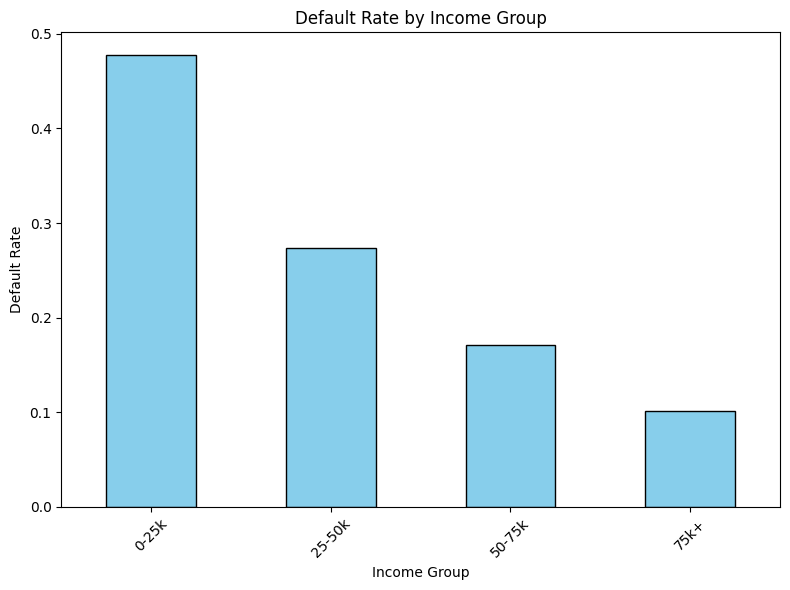

In [23]:
# calculate default rate by income group
default_rate = df.groupby('income_group')['Current_loan_status'].mean()

# plot income bin vs default rate
plt.figure(figsize=(8, 6))
default_rate.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Income Group')
plt.ylabel('Default Rate')
plt.title('Default Rate by Income Group')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()